In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("all_sector.csv")
df.shape

(1626, 1107)

In [4]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.shape

(1626, 1106)

In [5]:
df.drop_duplicates(inplace=True)
df.shape

(1626, 1106)

In [22]:
df.corr()


,Annual Salary,Experience,Education,Position,Rating,Is Remote,Company Old,Career Opportunities,Comp & Benefits,Culture & Values,...,Job Title_IT Business Analyst I-REMOTE,Job Title_IT Business Analyst II,"Job Title_Intermediate + Senior Business Analyst, Agile",Job Title_JR Business Analyst,Job Title_Jr Business Analyst,Job Title_Junior Business Analyst,Job Title_Junior Business Intelligence Analyst,Job Title_Technical Business Analyst,Job Title_Xstore Business analyst,Location_Pennsylvania
Annual Salary,1.000000,0.165677,0.075758,0.008747,0.081231,0.138082,-0.080562,0.112238,0.122021,0.096003,...,-0.049501,0.004706,0.089506,-0.146830,-0.118144,-0.051420,-0.040992,0.040620,0.142249,0.041071
Experience,0.165677,1.000000,0.596314,0.435847,-0.008537,0.053467,-0.078477,-0.003544,-0.004694,-0.007646,...,0.060070,-0.056228,-0.056228,-0.056228,-0.024808,-0.056228,0.060070,-0.056228,0.137601,0.060070
Education,0.075758,0.596314,1.000000,0.522630,-0.013833,0.029198,-0.130686,-0.011554,-0.024718,-0.011308,...,0.019371,0.117106,0.019371,0.117106,-0.111331,0.019371,0.019371,0.019371,0.117106,0.019371
Position,0.008747,0.435847,0.522630,1.000000,0.021983,-0.034827,0.022308,0.025050,0.030249,0.035887,...,0.132305,0.132305,0.132305,-0.074538,-0.105895,0.028884,0.028884,0.132305,-0.074538,-0.074538
Rating,0.081231,-0.008537,-0.013833,0.021983,1.000000,-0.108298,0.211460,0.881757,0.872317,0.885762,...,-0.001279,0.051959,0.057874,-0.001279,-0.018625,0.046043,0.004636,0.040128,-0.249721,0.022382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Job Title_Junior Business Analyst,-0.051420,-0.056228,0.019371,0.028884,0.046043,-0.046057,-0.033694,0.056734,0.005837,0.061426,...,-0.009091,-0.009091,-0.009091,-0.009091,-0.012915,1.000000,-0.009091,-0.009091,-0.009091,-0.009091
Job Title_Junior Business Intelligence Analyst,-0.040992,0.060070,0.019371,0.028884,0.004636,-0.046057,-0.008643,0.014831,-0.012159,-0.002953,...,-0.009091,-0.009091,-0.009091,-0.009091,-0.012915,-0.009091,1.000000,-0.009091,-0.009091,-0.009091
Job Title_Technical Business Analyst,0.040620,-0.056228,0.019371,0.132305,0.040128,0.197386,0.053982,0.032789,0.047827,0.043868,...,-0.009091,-0.009091,-0.009091,-0.009091,-0.012915,-0.009091,-0.009091,1.000000,-0.009091,-0.009091
Job Title_Xstore Business analyst,0.142249,0.137601,0.117106,-0.074538,-0.249721,0.197386,-0.088804,-0.242576,-0.246107,-0.242910,...,-0.009091,-0.009091,-0.009091,-0.009091,-0.012915,-0.009091,-0.009091,-0.009091,1.000000,-0.009091


<AxesSubplot:ylabel='Experience'>

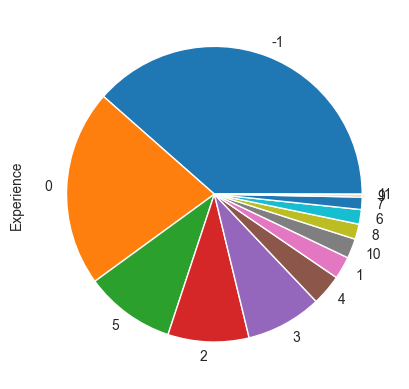

In [6]:
df['Experience'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Is Remote'>

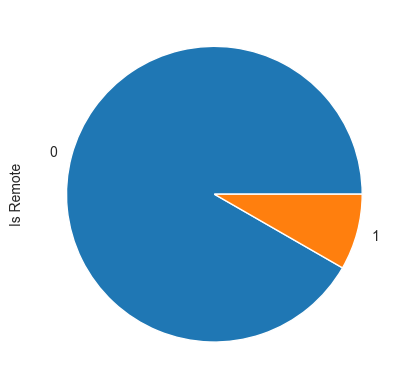

In [7]:
df['Is Remote'].value_counts().plot(kind='pie')

<AxesSubplot:>

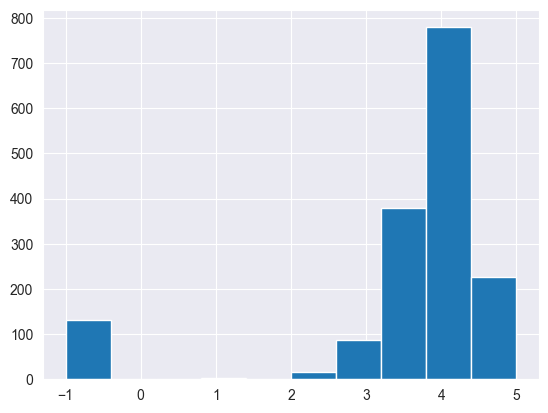

In [8]:
df['Rating'].hist()

<AxesSubplot:>

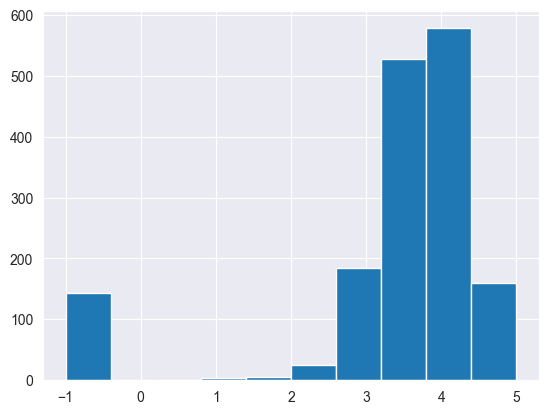

In [9]:
df['Work Life Balance'].hist()

<AxesSubplot:>

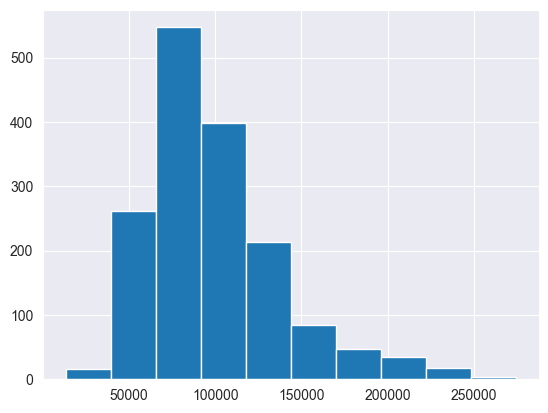

In [10]:
df['Annual Salary'].hist()

<AxesSubplot:>

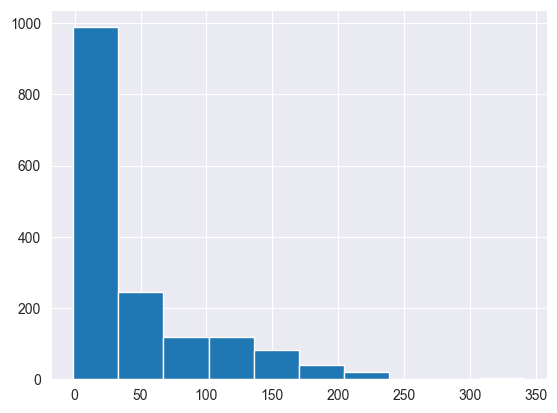

In [11]:
df['Company Old'].hist()

<AxesSubplot:>

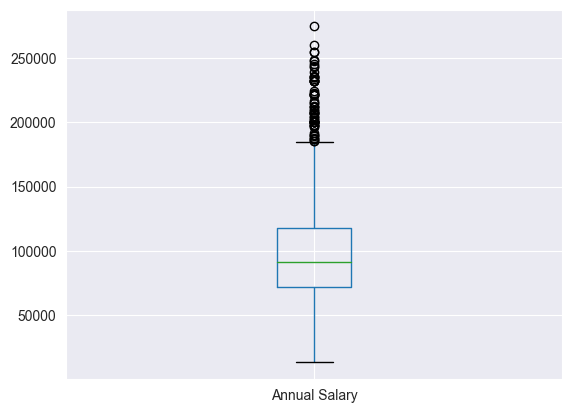

In [12]:
df.boxplot(column=[ 'Annual Salary'])

<BarContainer object of 1626 artists>

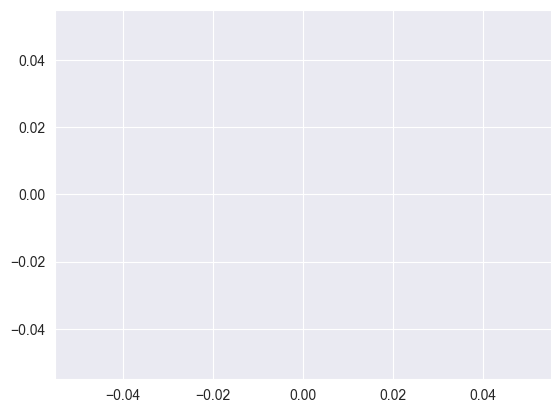

In [23]:
plt.bar(df['Experience'], df['Annual Salary'])


<BarContainer object of 1626 artists>

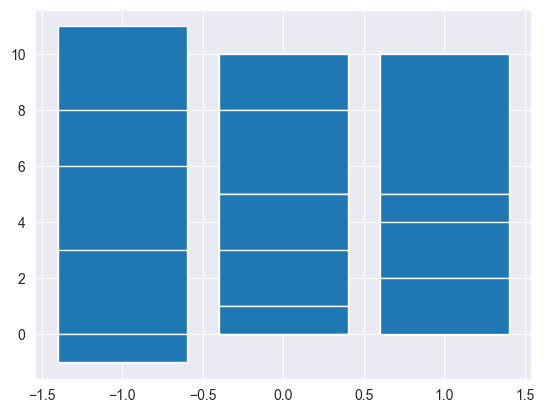

In [21]:
plt.bar(df['Position'], df['Experience'])


<AxesSubplot:>

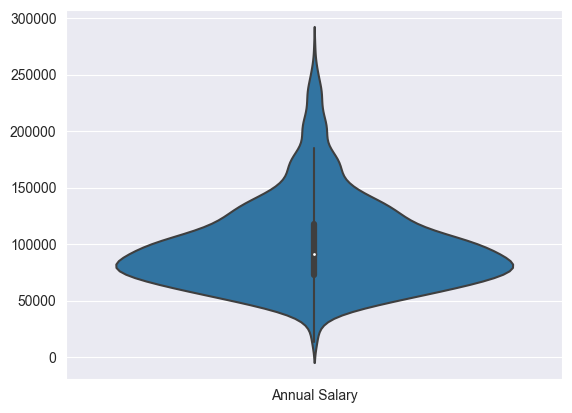

In [19]:
sns.violinplot(data=df[[ 'Annual Salary']])


<AxesSubplot:>

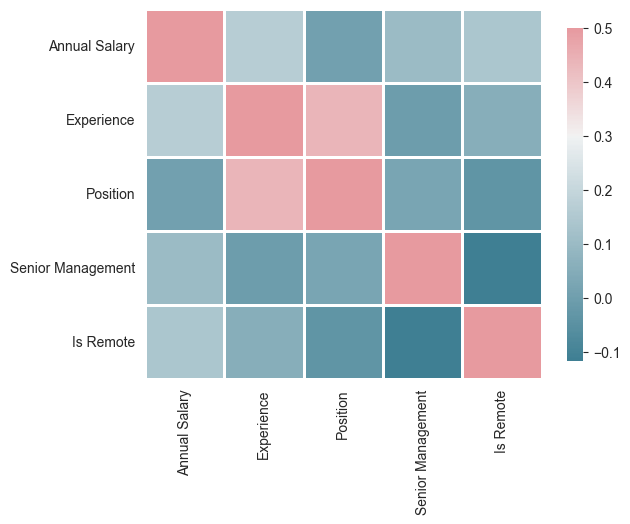

In [14]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
data = df[['Annual Salary', 'Experience', 'Position', 'Senior Management', 'Is Remote']].corr()
sns.heatmap(data, vmax=.5, center=0.3, cmap=cmap,square=False, linewidths=0.9, cbar_kws={'shrink':.9}, annot=False)